<a href="https://colab.research.google.com/github/shreyamhetre/plant-disease-detection/blob/main/plant_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from google.colab import drive

In [ ]:
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/plant_images'
train_dir = '/content/drive/MyDrive/plant_images/Train/Train'
test_dir = '/content/drive/MyDrive/plant_images/Test/Test'
validate_dir = '/content/drive/MyDrive/plant_images/Validation/Validation'


In [ ]:
# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Validation and test data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)
validate_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')


Found 1322 images belonging to 3 classes.


In [ ]:
# Flow validation images in batches of 32 using validate_datagen generator
validation_generator = validate_datagen.flow_from_directory(validate_dir,
                                                            target_size=(150, 150),
                                                            batch_size=32,
                                                            class_mode='categorical')

# Flow test images in batches of 32 using test_datagen generator
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')
output_classes = 3  # Number of classes in your dataset

Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(output_classes, activation='softmax')  # Output layer with softmax activation
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_generator,
                    steps_per_epoch=None,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=None,
                    verbose=2)



Epoch 1/10
42/42 - 212s - loss: 0.9256 - accuracy: 0.5454 - val_loss: 0.6455 - val_accuracy: 0.7000 - 212s/epoch - 5s/step
Epoch 2/10
42/42 - 94s - loss: 0.6576 - accuracy: 0.7413 - val_loss: 0.4246 - val_accuracy: 0.8333 - 94s/epoch - 2s/step
Epoch 3/10
42/42 - 101s - loss: 0.3755 - accuracy: 0.8775 - val_loss: 0.3776 - val_accuracy: 0.8667 - 101s/epoch - 2s/step
Epoch 4/10
42/42 - 91s - loss: 0.3252 - accuracy: 0.8835 - val_loss: 0.3587 - val_accuracy: 0.8833 - 91s/epoch - 2s/step
Epoch 5/10
42/42 - 94s - loss: 0.2908 - accuracy: 0.8926 - val_loss: 0.2243 - val_accuracy: 0.9000 - 94s/epoch - 2s/step
Epoch 6/10
42/42 - 93s - loss: 0.2671 - accuracy: 0.9100 - val_loss: 0.2044 - val_accuracy: 0.9167 - 93s/epoch - 2s/step
Epoch 7/10
42/42 - 98s - loss: 0.2439 - accuracy: 0.9266 - val_loss: 0.3023 - val_accuracy: 0.9000 - 98s/epoch - 2s/step
Epoch 8/10
42/42 - 95s - loss: 0.2050 - accuracy: 0.9266 - val_loss: 0.2668 - val_accuracy: 0.8833 - 95s/epoch - 2s/step
Epoch 9/10
42/42 - 92s - los

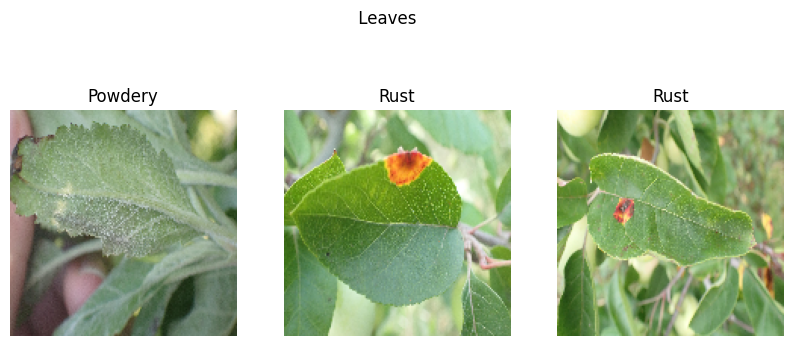

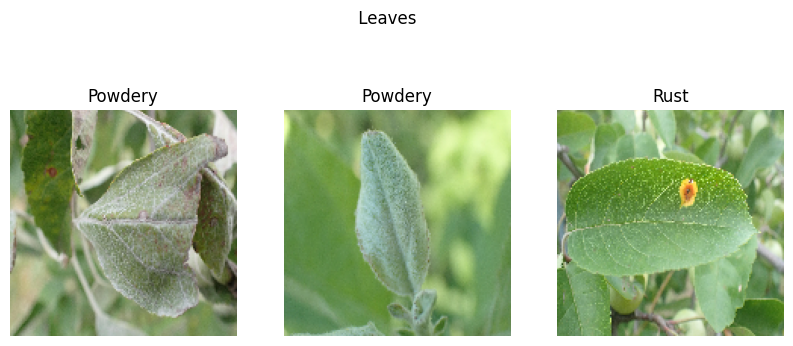

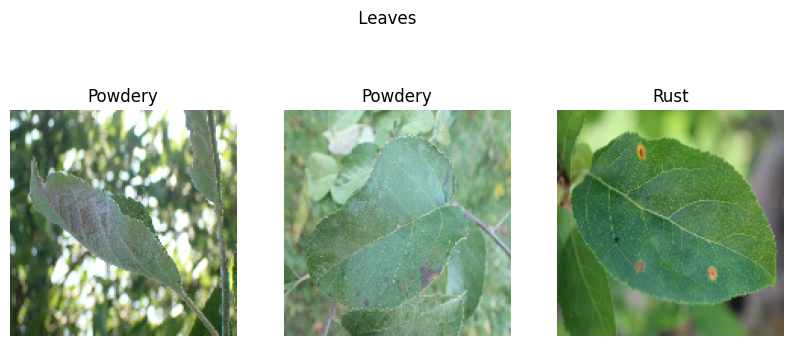

In [ ]:
import matplotlib.pyplot as plt

# Function to display images from a given generator
def display_images(generator, title):
    # Retrieve a batch of images and labels from the generator
    images, labels = next(generator)

    # Map label indices to class names
    class_names = list(generator.class_indices.keys())

    # Create a subplot for each image
    plt.figure(figsize=(10, 10))
    for i in range(3):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])  # Set title to the class name
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Display 3 healthy leaves
display_images(test_generator, " Leaves")

# Display 3 rust-infected leaves
test_generator.reset()  # Reset generator to the beginning
for _ in range(3):
    next(test_generator)  # Skip the first 3 images
display_images(test_generator, " Leaves")

# Display 3 powdery mildew-infected leaves
test_generator.reset()  # Reset generator to the beginning
for _ in range(6):
    next(test_generator)  # Skip the first 6 images
display_images(test_generator, " Leaves")

In [ ]:
# Display accuracy
print("Validation Accuracy:", history.history['val_accuracy'][-1])


Validation Accuracy: 0.8500000238418579


5/5 [==============================] - 10s 2s/step


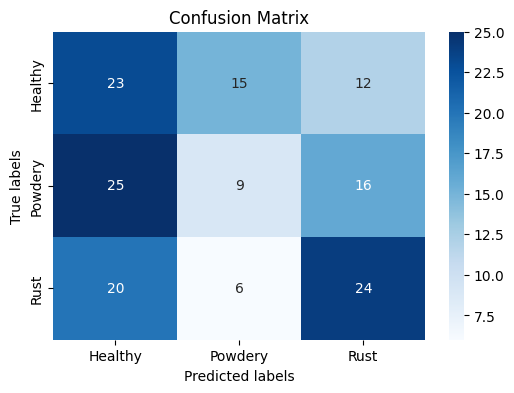

In [ ]:
# Generate predictions on test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


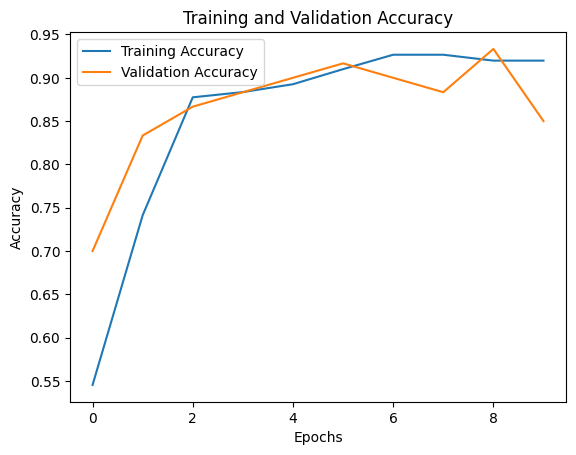

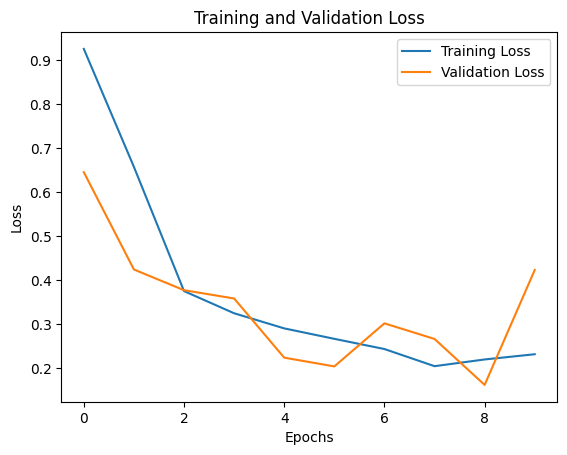

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
